In [36]:
import astropy.constants as const
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from plotting import label_axes
from utils import GeV_over_c, gauss_cgs

# Problem statement

...


In [22]:
import scipy
import scipy.integrate


def integrand(lnx: float, gamma: float) -> float:
    x = np.exp(lnx)
    jacobian = x
    return jacobian * (x ** (2 - gamma)) * (np.sqrt(x**2 + 1) - 1)


def integral(p0: u.Quantity[GeV_over_c], gamma: float):
    lnx_min = np.log((p0 / (const.m_p * const.c)).decompose().value)
    # lnx_max = np.inf
    lnx_max = 15 + lnx_min
    res, _ = scipy.integrate.quad(func=integrand, a=lnx_min, b=lnx_max, args=(gamma,))
    return res

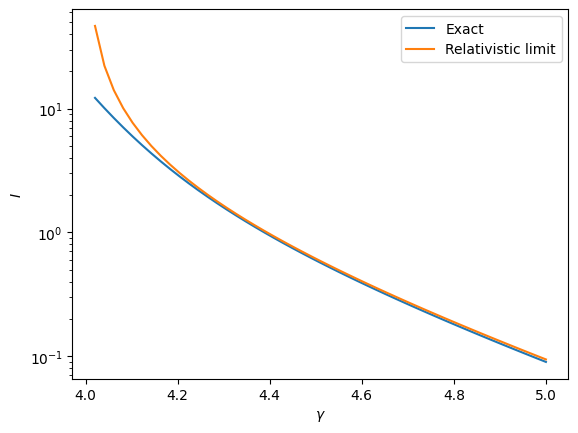

In [29]:
gamma_grid = np.linspace(4, 5, 50)[1:]
p0 = 10 * GeV_over_c

fig, ax = plt.subplots()

ax.plot(
    gamma_grid, np.array([integral(p0, gamma) for gamma in gamma_grid]), label="Exact"
)
ax.plot(
    gamma_grid,
    -((p0 / (const.m_p * const.c)) ** (4 - gamma_grid)) / (4 - gamma_grid),
    label="Relativistic limit",
)

ax.legend()
ax.set_yscale("log")
ax.set_xlabel("$\\gamma$")
ax.set_ylabel("$ I $")
plt.show()

In [34]:
print((1 / (const.sigma_T * 1 / u.cm**3)).to(u.kpc))

487.1551136133602 kpc


In [44]:
D = 1e28 * u.cm**2 / u.s
B0 = 1e-6 * gauss_cgs
q = 1 * const.e.gauss
gamma = 1
Omega = (q * B0 / (gamma * const.m_p * const.c)).to(1/u.yr)
rL = const.c / Omega

F = (rL * const.c / 3) / D

print(F.decompose())

3.127573627201635e-06
